In [1]:
from src.model import load_trained, sceptr_unidirectional
from pathlib import Path
import re
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

filedir = Path.cwd() / "results" / "sceptr"
pattern = re.compile(r"eval-set-auc-(.*).csv")
bestepochs = [
    (i, int(pattern.findall(file.name)[0]))
    for i, file in enumerate(list(filedir.glob("**/eval-set-auc-*.csv")))
]

models = {
    i: filedir / f"trained-sceptr-caneval-{i}" / f"Epoch {e}" / f"classifier-{e}.pth" for i, e in bestepochs
}

models = {
    i: load_trained(dir, sceptr_unidirectional) for i, dir in models.items()
}

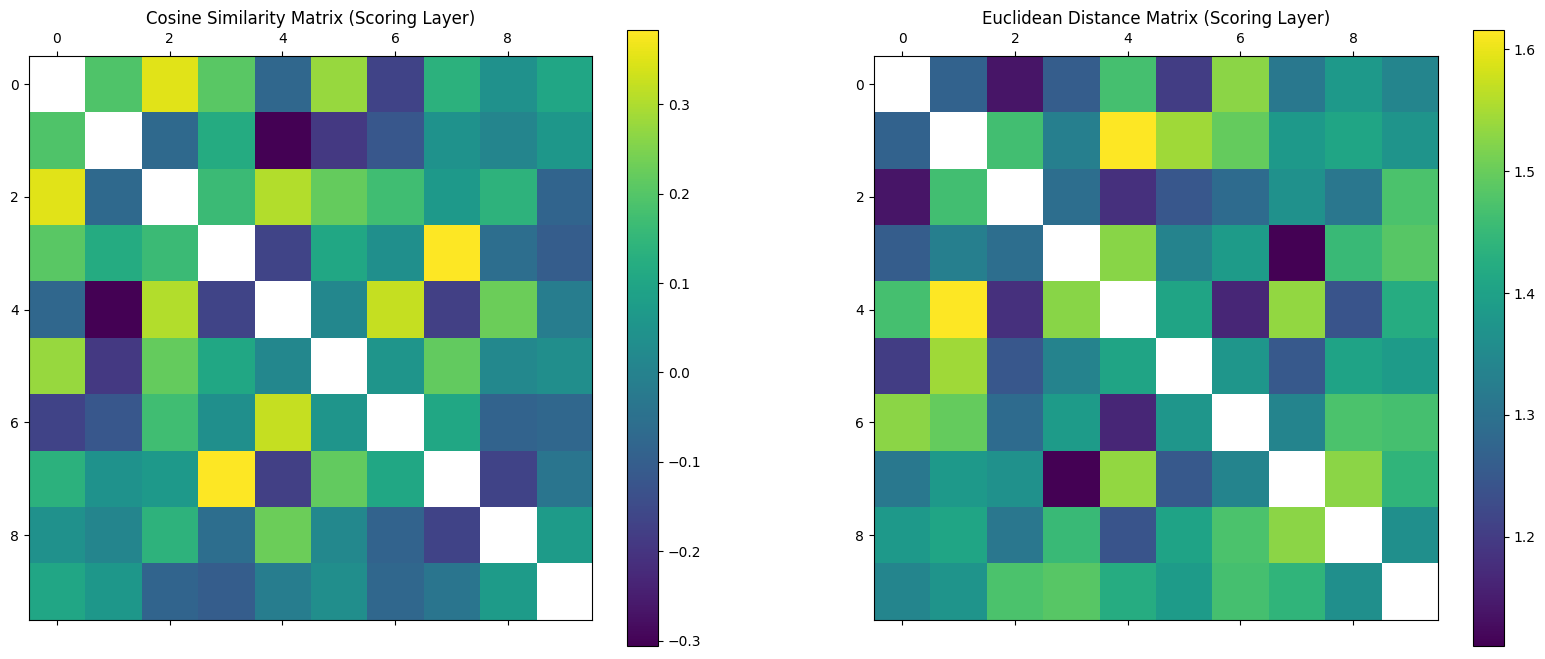

In [2]:
cosine_sim = np.zeros((len(models.keys()), len(models.keys())))
euclid_sim = np.zeros((len(models.keys()), len(models.keys())))

for i, model_i in models.items():
    for j, model_j in models.items():
        model_i_param = model_i.scoring_linear1.weight.detach().cpu().numpy()[0]
        model_j_param = model_j.scoring_linear1.weight.detach().cpu().numpy()[0]
        model_i_param /= np.linalg.norm(model_i_param, 2)
        model_j_param /= np.linalg.norm(model_j_param, 2)
        cosine_sim[i, j] = np.dot(model_i_param, model_j_param)
        euclid_sim[i, j] = np.linalg.norm(model_i_param - model_j_param, 2)

cosine_sim /= (1 - np.eye(len(models.keys())))
euclid_sim /= (1 - np.eye(len(models.keys())))

fig, axs = plt.subplots(ncols = 2, figsize = (20, 8))
csm = axs[0].matshow(cosine_sim)
axs[0].set_title("Cosine Similarity Matrix (Scoring Layer)")
fig.colorbar(csm, ax=axs[0])
edm = axs[1].matshow(euclid_sim)
axs[1].set_title("Euclidean Distance Matrix (Scoring Layer)")
fig.colorbar(edm, ax=axs[1])
plt.show()

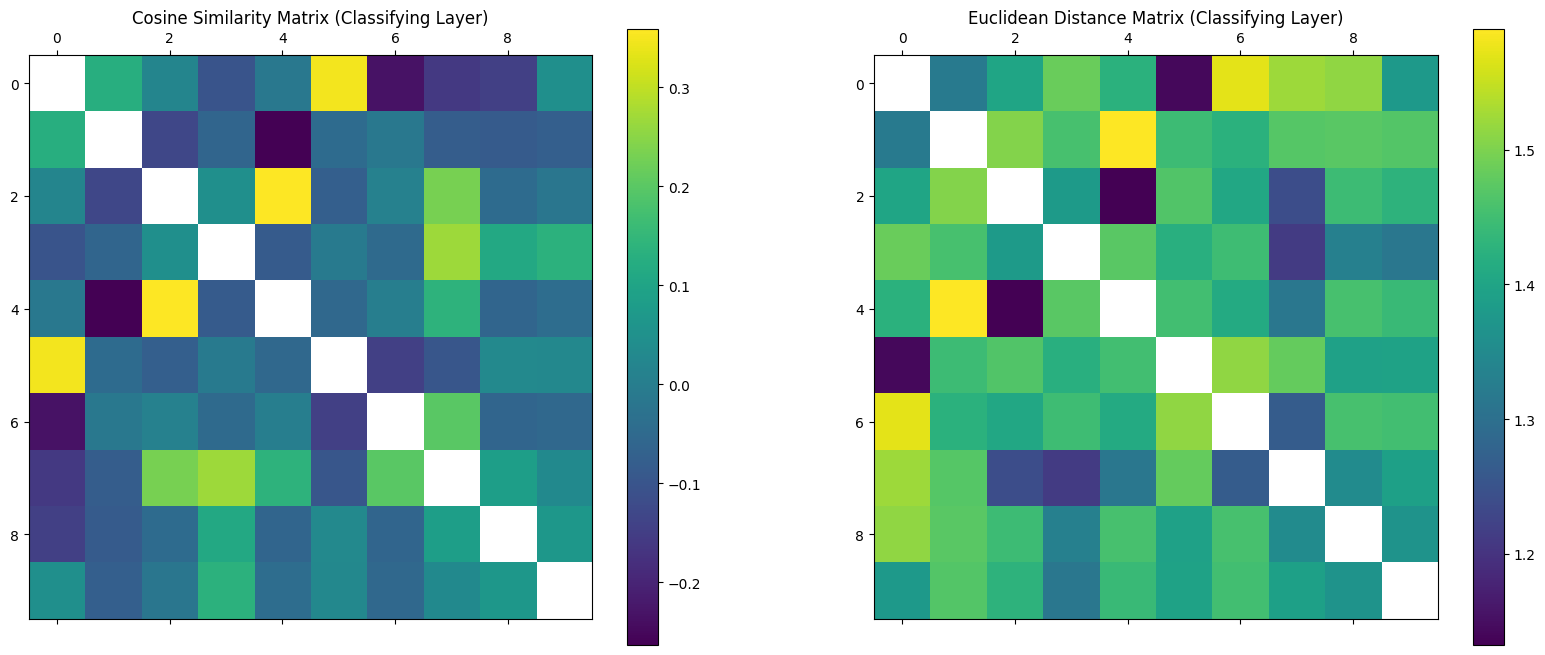

In [3]:
# scoring
import numpy as np
import matplotlib.pyplot as plt

cosine_sim = np.zeros((len(models.keys()), len(models.keys())))
euclid_sim = np.zeros((len(models.keys()), len(models.keys())))

for i, model_i in models.items():
    for j, model_j in models.items():
        model_i_param = model_i.classifying_linear1.weight.detach().cpu().numpy()[0]
        model_j_param = model_j.classifying_linear1.weight.detach().cpu().numpy()[0]
        model_i_param /= np.linalg.norm(model_i_param, 2)
        model_j_param /= np.linalg.norm(model_j_param, 2)
        cosine_sim[i, j] = np.dot(model_i_param, model_j_param)
        euclid_sim[i, j] = np.linalg.norm(model_i_param - model_j_param, 2)

cosine_sim /= (1 - np.eye(len(models.keys())))
euclid_sim /= (1 - np.eye(len(models.keys())))

fig, axs = plt.subplots(ncols = 2, figsize = (20, 8))
csm = axs[0].matshow(cosine_sim)
axs[0].set_title("Cosine Similarity Matrix (Classifying Layer)")
fig.colorbar(csm, ax=axs[0])
edm = axs[1].matshow(euclid_sim)
axs[1].set_title("Euclidean Distance Matrix (Classifying Layer)")
fig.colorbar(edm, ax=axs[1])
plt.show()

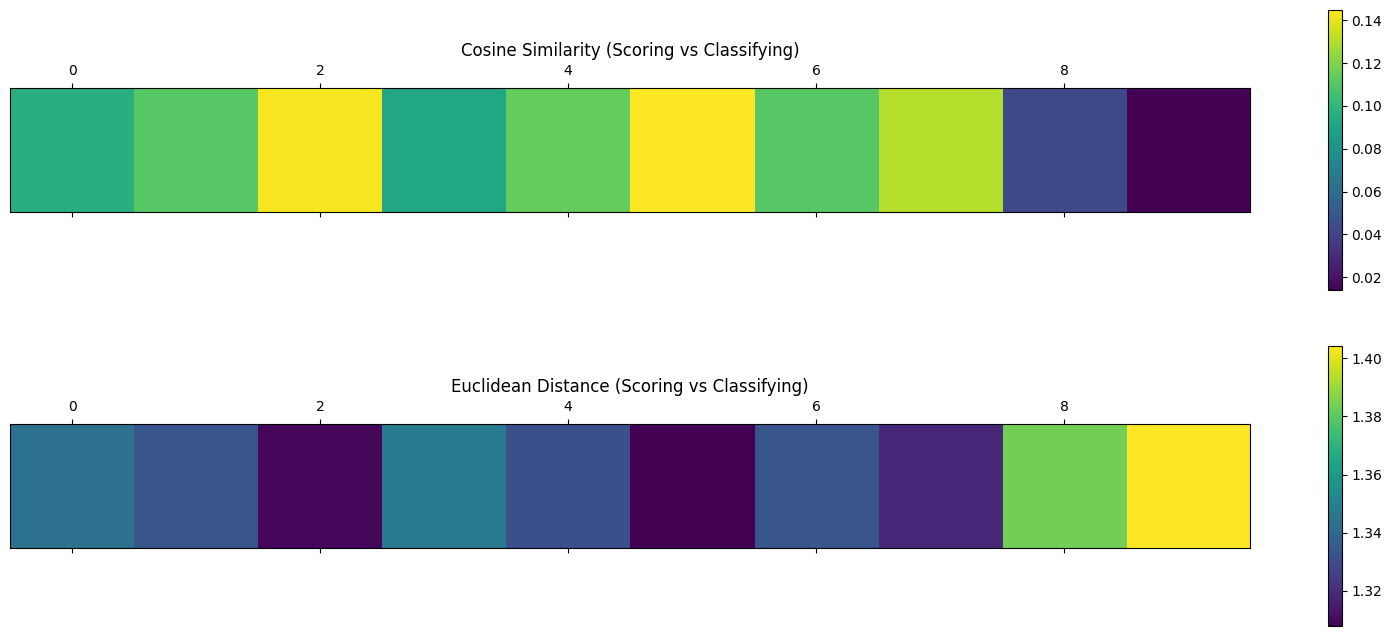

In [4]:
# scoring
import numpy as np
import matplotlib.pyplot as plt

cosine_sim = np.zeros((len(models.keys()), 1))
euclid_sim = np.zeros((len(models.keys()), 1))

for i, model in models.items():
    scoring = model.scoring_linear1.weight.detach().cpu().numpy()[0]
    classifying = model.classifying_linear1.weight.detach().cpu().numpy()[0]
    scoring /= np.linalg.norm(scoring, 2)
    classifying /= np.linalg.norm(classifying, 2)
    cosine_sim[i, 0] = np.dot(scoring, classifying)
    euclid_sim[i, 0] = np.linalg.norm(scoring - classifying, 2)

fig, axs = plt.subplots(nrows = 2, figsize = (20, 8))
csm = axs[0].matshow(cosine_sim.T)
axs[0].set_title("Cosine Similarity (Scoring vs Classifying)")
axs[0].set_yticks([])
axs[0].set_yticklabels([])
fig.colorbar(csm, ax=axs[0])
edm = axs[1].matshow(euclid_sim.T)
axs[1].set_title("Euclidean Distance (Scoring vs Classifying)")
axs[1].set_yticks([])
axs[1].set_yticklabels([])  

fig.colorbar(edm, ax=axs[1])
plt.show()